In [2]:
import os
import os.path
import pandas as pd

from arcgis.gis import *
import matplotlib.pyplot as plt
import helpers
import numpy as np
from pandas.io.json import json_normalize


# Definitions

ROW_LIMIT = 20000
ROW_DISPLAY_LIMIT = 10

COLLISSIONS_URL = "https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv?accessType=DOWNLOAD"
COLLISSIONS_FILE = "../data/NYPD_Motor_Vehicle_Collisions.csv"
SPEED_LIMIT_PATH = "../data/speed_limit/"
SPEED_LIMIT_BRONX_FILE = "../data/speed_limit_bronx.json"

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', ROW_LIMIT)

In [3]:
# 1. Extract
## 1.1 Extract Collissions

if not os.path.isfile(COLLISSIONS_FILE):
    helpers.download_file(COLLISSIONS_URL, COLLISSIONS_FILE)

# Comment: Column X (23) is the uID - UNIQUE KEY
dfColissions = pd.read_csv(COLLISSIONS_FILE, index_col=23, low_memory=False)


# Comment: Display 10 results
dfColissions.head(ROW_DISPLAY_LIMIT)

/Library/Python/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


DATE  TIME        BOROUGH ZIP CODE   LATITUDE  LONGITUDE  \
UNIQUE KEY                                                                   
3785674     11/07/2017  0:00       BROOKLYN    11211  40.709550 -73.958870   
3785064     11/07/2017  0:00       BROOKLYN    11220  40.634070 -74.013320   
3785275     11/07/2017  0:00         QUEENS    11356  40.781185 -73.838745   
3785356     11/07/2017  0:00         QUEENS    11433  40.702410 -73.792530   
3784960     11/07/2017  0:00            NaN      NaN  40.803936 -73.907060   
3785700     11/07/2017  0:00            NaN      NaN  40.710876 -74.014390   
3784889     11/07/2017  0:00            NaN      NaN  40.844948 -73.903400   
3785537     11/07/2017  0:00  STATEN ISLAND    10310  40.633858 -74.125960   
3785428     11/07/2017  0:00            NaN      NaN  40.601486 -74.193275   
3785607     11/07/2017  0:05         QUEENS    11372  40.748173 -73.894966   

                           LOCATION                    ON STREET NAME  \
UNIQUE KEY                                                              
3785674       (40.70955, -73.95887)  HAVEMEYER STREET                   
3785064       (40.63407, -74.01332)                               NaN   
3785275     (40.781185, -73.838745)                               NaN   
3785356       (40.70241, -73.79253)  165 STREET                         
3784960      (40.803936, -73.90706)  EAST 140 STREET                    
3785700      (40.710876, -74.01439)  LIBERTY STREET                     
3784889       (40.844948, -73.9034)                               NaN   
3785537      (40.633858, -74.12596)  CLOVE ROAD                         
3785428     (40.601486, -74.193275)                               NaN   
3785607     (40.748173, -73.894966)                               NaN   

           CROSS STREET NAME                           OFF STREET NAME  \
UNIQUE KEY                                                               
3785674       SOUTH 5 STREET                                       NaN   
3785064                  NaN  730       64 STREET                        
3785275                  NaN  20-44     130 STREET                       
3785356       LIBERTY AVENUE                                       NaN   
3784960                  NaN                                       NaN   
3785700                  NaN                                       NaN   
3784889                  NaN                                       NaN   
3785537     CASTLETON AVENUE                                       NaN   
3785428                  NaN  1775      SOUTH AVENUE                     
3785607                  NaN  70-50     BROADWAY                         

            NUMBER OF PERSONS INJURED  NUMBER OF PERSONS KILLED  \
UNIQUE KEY                                                        
3785674                             0                         0   
3785064                             0                         0   
3785275                             0                         0   
3785356                             0                         0   
3784960                             0                         0   
3785700                             0                         0   
3784889                             0                         0   
3785537                             1                         0   
3785428                             1                         0   
3785607                             0                         0   

            NUMBER OF PEDESTRIANS INJURED  NUMBER OF PEDESTRIANS KILLED  \
UNIQUE KEY                                                                
3785674                                 0                             0   
3785064                                 0                             0   
3785275                                 0                             0   
3785356                                 0                             0   
3784960                                 0                   

In [4]:
# Comment: Size of the loaded data
len(dfColissions)

1149760

In [5]:

# Comment: We might need DATE and TIME merged
dfColissions.count(axis='index')


DATE                             1149760
TIME                             1149760
BOROUGH                           827271
ZIP CODE                          827189
LATITUDE                          938346
LONGITUDE                         938346
LOCATION                          938346
ON STREET NAME                    930643
CROSS STREET NAME                 880431
OFF STREET NAME                   174857
NUMBER OF PERSONS INJURED        1149760
NUMBER OF PERSONS KILLED         1149760
NUMBER OF PEDESTRIANS INJURED    1149760
NUMBER OF PEDESTRIANS KILLED     1149760
NUMBER OF CYCLIST INJURED        1149760
NUMBER OF CYCLIST KILLED         1149760
NUMBER OF MOTORIST INJURED       1149760
NUMBER OF MOTORIST KILLED        1149760
CONTRIBUTING FACTOR VEHICLE 1    1144750
CONTRIBUTING FACTOR VEHICLE 2     996992
CONTRIBUTING FACTOR VEHICLE 3      74839
CONTRIBUTING FACTOR VEHICLE 4      16104
CONTRIBUTING FACTOR VEHICLE 5       3955
VEHICLE TYPE CODE 1              1141210
VEHICLE TYPE COD

In [6]:
## 1.2 Extract Speed Limits

# Comment: We should look all speed_limit files and merge into one dataFrame.
dfSpeedLimitExtract = pd.read_json(SPEED_LIMIT_BRONX_FILE, lines=True)

# Comment: Normalize the json files
dfSpeedLimit = pd.concat([pd.DataFrame(json_normalize(x)) for x in dfSpeedLimitExtract['features']], ignore_index = True)
dfSpeedLimit.head(ROW_DISPLAY_LIMIT)

geometry.coordinates geometry.type  id  \
0  [[-73.92294305899998, 40.81306719400004], [-73...    LineString   0   
1  [[-73.91638113699997, 40.82754182700006], [-73...    LineString   1   
2  [[-73.90722353899997, 40.86886004100006], [-73...    LineString   2   
3  [[-73.89487076899997, 40.808913321000034], [-7...    LineString   3   
4  [[-73.89560144699993, 40.81168957500006], [-73...    LineString   4   
5  [[-73.89952710199998, 40.85011207400004], [-73...    LineString   5   
6  [[-73.90097053899996, 40.87640008400007], [-73...    LineString   6   
7  [[-73.90050246499999, 40.88040950900006], [-73...    LineString   7   
8  [[-73.88937305899998, 40.87339058900005], [-73...    LineString   8   
9  [[-73.88726579099995, 40.85953712400004], [-73...    LineString   9   

  properties.postvz_sg  properties.postvz_sl       properties.street     type  
0                   NO                    25        ALEXANDER AVENUE  Feature  
1                   NO                    25            BONNER PLACE  Feature  
2                   NO                    25           BAILEY AVENUE  Feature  
3                   NO                    25            BARRY STREET  Feature  
4                   NO                    25            BARRY STREET  Feature  
5                   NO                    25             ALDEN PLACE  Feature  
6                   NO                    25            ARMAND PLACE  Feature  
7                   NO                    25            BAILEY PLACE  Feature  
8                   NO                    25  BEDFORD PARK BOULEVARD  Feature  
9                   NO                    25         BATHGATE AVENUE  Feature

In [8]:
# 2. Transform
# 2.1 Merge Collisions and Speed Limits

# Comment: One merge example. We could also merge by GeoLocation after we have a simple ETL in place.

dfCollisionAndSpeedLimit = pd.merge(dfColissions.loc[dfColissions['BOROUGH'] == 'BRONX'], dfSpeedLimit, left_on='CROSS STREET NAME', right_on='properties.street', how='inner')
dfCollisionAndSpeedLimit.head(ROW_DISPLAY_LIMIT)

DATE   TIME BOROUGH ZIP CODE   LATITUDE  LONGITUDE  \
0  11/07/2017   0:55   BRONX    10469  40.861164 -73.857574   
1  11/07/2017   0:55   BRONX    10469  40.861164 -73.857574   
2  09/05/2017  15:00   BRONX    10467  40.861336 -73.866806   
3  09/05/2017  15:00   BRONX    10467  40.861336 -73.866806   
4  09/03/2017  19:45   BRONX    10469  40.860850 -73.840890   
5  09/03/2017  19:45   BRONX    10469  40.860850 -73.840890   
6  08/29/2017   9:44   BRONX    10467  40.861336 -73.866806   
7  08/29/2017   9:44   BRONX    10467  40.861336 -73.866806   
8  08/26/2017   6:15   BRONX    10467  40.861343 -73.867490   
9  08/26/2017   6:15   BRONX    10467  40.861343 -73.867490   

                  LOCATION                    ON STREET NAME  \
0  (40.861164, -73.857574)  WILLIAMSBRIDGE ROAD                
1  (40.861164, -73.857574)  WILLIAMSBRIDGE ROAD                
2  (40.861336, -73.866806)  BOSTON ROAD                        
3  (40.861336, -73.866806)  BOSTON ROAD                        
4    (40.86085, -73.84089)  MICKLE AVENUE                      
5    (40.86085, -73.84089)  MICKLE AVENUE                      
6  (40.861336, -73.866806)  BOSTON ROAD                        
7  (40.861336, -73.866806)  BOSTON ROAD                        
8   (40.861343, -73.86749)  WHITE PLAINS ROAD                  
9   (40.861343, -73.86749)  WHITE PLAINS ROAD                  

  CROSS STREET NAME OFF STREET NAME  NUMBER OF PERSONS INJURED  \
0     WARING AVENUE             NaN                          1   
1     WARING AVENUE             NaN                          1   
2     WARING AVENUE             NaN                          1   
3     WARING AVENUE             NaN                          1   
4     WARING AVENUE             NaN                          2   
5     WARING AVENUE             NaN                          2   
6     WARING AVENUE             NaN                          0   
7     WARING AVENUE             NaN                          0   
8     WARING AVENUE             NaN                          0   
9     WARING AVENUE             NaN                          0   

   NUMBER OF PERSONS KILLED  NUMBER OF PEDESTRIANS INJURED  \
0                         0                              0   
1                         0                              0   
2                         0                              0   
3                         0                              0   
4                         0                              0   
5                         0                              0   
6                         0                              0   
7                         0                              0   
8                         0                              0   
9                         0                              0   

   NUMBER OF PEDESTRIANS KILLED  NUMBER OF CYCLIST INJURED  \
0                             0                          0   
1                             0                          0   
2                             0                          0   
3                             0                          0   
4                             0                          0   
5                             0                          0   
6                             0                          0   
7                             0                          0   
8                             0                          0   
9                             0                          0   

   NUMBER OF CYCLIST KILLED  NUMBER OF MOTORIST INJURED  \
0                         0                           1   
1                         0                           1   
2                         0                           1   
3                         0                           1   
4                         0                           2   
5                         0                           2   
6                         0                           0   
7                         0                  

In [9]:
# Comment: Display collisions cause and speed limit

dfCollisionAndSpeedLimit['SPEEDING'] = np.where(dfCollisionAndSpeedLimit['CONTRIBUTING FACTOR VEHICLE 1']=='Unsafe Speed', True, False)
dfCollisionAndSpeedLimit[
    ['DATE', 'TIME', 'BOROUGH', 'CROSS STREET NAME', 'CONTRIBUTING FACTOR VEHICLE 1', 'properties.postvz_sl', 'SPEEDING']
].dropna(axis=0, how='any').head(ROW_DISPLAY_LIMIT)


DATE   TIME BOROUGH CROSS STREET NAME  \
0  11/07/2017   0:55   BRONX     WARING AVENUE   
1  11/07/2017   0:55   BRONX     WARING AVENUE   
2  09/05/2017  15:00   BRONX     WARING AVENUE   
3  09/05/2017  15:00   BRONX     WARING AVENUE   
4  09/03/2017  19:45   BRONX     WARING AVENUE   
5  09/03/2017  19:45   BRONX     WARING AVENUE   
6  08/29/2017   9:44   BRONX     WARING AVENUE   
7  08/29/2017   9:44   BRONX     WARING AVENUE   
8  08/26/2017   6:15   BRONX     WARING AVENUE   
9  08/26/2017   6:15   BRONX     WARING AVENUE   

    CONTRIBUTING FACTOR VEHICLE 1  properties.postvz_sl  SPEEDING  
0             Alcohol Involvement                    25     False  
1             Alcohol Involvement                    25     False  
2  Driver Inattention/Distraction                    25     False  
3  Driver Inattention/Distraction                    25     False  
4                    Unsafe Speed                    25      True  
5                    Unsafe Speed                    25      True  
6  Driver Inattention/Distraction                    25     False  
7  Driver Inattention/Distraction                    25     False  
8  Passing or Lane Usage Improper                    25     False  
9  Passing or Lane Usage Improper                    25     False

In [10]:
# 3. Load + View

nycMap = GIS()
nycMap.map('New York City')

In [11]:
date_borough_cols = ['DATE', 'BOROUGH']
df_date_place = dfColissions[date_borough_cols]
df_date_place = df_date_place.dropna(axis=0, how='any');

df_date_place.head()

DATE        BOROUGH
UNIQUE KEY                           
3785674     11/07/2017       BROOKLYN
3785064     11/07/2017       BROOKLYN
3785275     11/07/2017         QUEENS
3785356     11/07/2017         QUEENS
3785537     11/07/2017  STATEN ISLAND

In [30]:
df_date_place['DATE']

UNIQUE KEY
3785674    11/07/2017
3785064    11/07/2017
3785275    11/07/2017
3785356    11/07/2017
3785537    11/07/2017
3785607    11/07/2017
3784705    11/07/2017
3785270    11/07/2017
3784877    11/07/2017
3785052    11/07/2017
3786270    11/07/2017
3786163    11/07/2017
3785458    11/07/2017
3785877    11/07/2017
3785846    11/07/2017
3785304    11/07/2017
3785440    11/07/2017
3785006    11/07/2017
3785975    11/07/2017
3785177    11/07/2017
3785611    11/07/2017
3785361    11/07/2017
3785644    11/07/2017
3785795    11/07/2017
3784948    11/07/2017
3785096    11/07/2017
3784936    11/07/2017
3785081    11/07/2017
3785228    11/07/2017
3785305    11/07/2017
3785439    11/07/2017
3785349    11/07/2017
3785422    11/07/2017
3784956    11/07/2017
3785483    11/07/2017
3785776    11/07/2017
3784965    11/07/2017
3785521    11/07/2017
3785071    11/07/2017
3786309    11/07/2017
3785054    11/07/2017
3785452    11/07/2017
3785171    11/07/2017
3784957    11/07/2017
3786458    11/07/2017

In [65]:
times = pd.DatetimeIndex(df_date_place['DATE'])
grouped = df_date_place.groupby([times.year, 'BOROUGH']).count() \
                  .unstack(fill_value=0) \
                  .reset_index()

In [80]:
grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
(DATE, )                 6 non-null int64
(DATE, BRONX)            6 non-null int64
(DATE, BROOKLYN)         6 non-null int64
(DATE, MANHATTAN)        6 non-null int64
(DATE, QUEENS)           6 non-null int64
(DATE, STATEN ISLAND)    6 non-null int64
dtypes: int64(6)
memory usage: 368.0 bytes


In [58]:
groupedIndexValues = grouped['DATE'].index.values

for indexValue in groupedIndexValues:
  print(indexValue)


df_test1 = df_test.groupby(['code' , 'year', 'week',  'place'])['vl'].sum() \
                  .unstack(fill_value=0) \
                  .reset_index() \
                  .rename_axis(None, axis=1)


('BRONX', 2012)
('BRONX', 2013)
('BRONX', 2014)
('BRONX', 2015)
('BRONX', 2016)
('BRONX', 2017)
('BROOKLYN', 2012)
('BROOKLYN', 2013)
('BROOKLYN', 2014)
('BROOKLYN', 2015)
('BROOKLYN', 2016)
('BROOKLYN', 2017)
('MANHATTAN', 2012)
('MANHATTAN', 2013)
('MANHATTAN', 2014)
('MANHATTAN', 2015)
('MANHATTAN', 2016)
('MANHATTAN', 2017)
('QUEENS', 2012)
('QUEENS', 2013)
('QUEENS', 2014)
('QUEENS', 2015)
('QUEENS', 2016)
('QUEENS', 2017)
('STATEN ISLAND', 2012)
('STATEN ISLAND', 2013)
('STATEN ISLAND', 2014)
('STATEN ISLAND', 2015)
('STATEN ISLAND', 2016)
('STATEN ISLAND', 2017)


In [ ]:
newDF = 

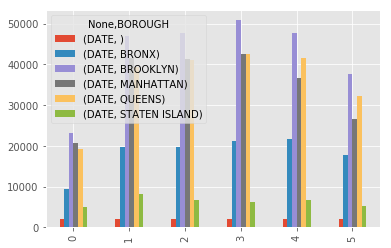

In [85]:
% matplotlib inline
plt.style.use('ggplot')
grouped.plot(kind='bar')